<a href="https://colab.research.google.com/github/sethkipsangmutuba/Matplotlib/blob/main/a4_Errorbars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Uncertainties

In scientific research, clearly showing uncertainty is as crucial as reporting results. Without it, comparing findings is unclear. Including uncertainty lets us assess consistency and strengthens the plot’s clarity.

## Visualizing Uncertainty with Error Bars
A simple way to show data uncertainty is with error bars. Matplotlib makes this easy with one function call.

In [15]:
# Set up for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn-style plots


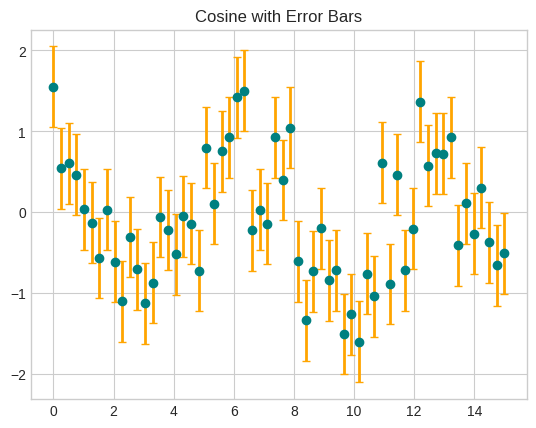

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# New data
x = np.linspace(0, 15, 60)
dy = 0.5
y = np.cos(x) + dy * np.random.randn(60)

# Errorbar plot with different color and marker
plt.errorbar(x, y, yerr=dy, fmt='o', color='teal', ecolor='orange', elinewidth=2, capsize=3)
plt.title("Cosine with Error Bars")
plt.show()


### Formatting with `errorbar`

In `plt.errorbar`, the `fmt` string sets marker and line style. Lighter, thinner error bars help maintain clarity in complex or crowded visualizations.


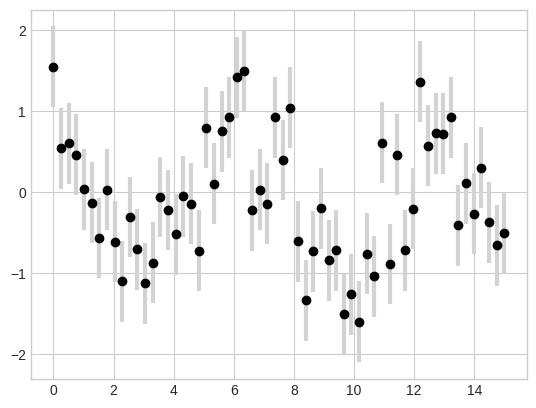

In [17]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors

To show uncertainty in continuous data, use `plt.plot` with `plt.fill_between`.  
This is useful in methods like Gaussian process regression to visualize confidence intervals clearly.


In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import matplotlib.pyplot as plt

# Different sample data
x = np.array([2, 4, 6, 7, 9])
y = np.log(x) * np.cos(x)

# Fit Gaussian Process
gp = GaussianProcessRegressor().fit(x[:, None], y)

# Predict with uncertainty
x_fit = np.linspace(1, 10, 1000)
y_fit, y_err = gp.predict(x_fit[:, None], return_std=True)
y_fit, y_err

(array([-0.09910426, -0.10021543, -0.10133435, -0.10246106, -0.10359558,
        -0.10473796, -0.10588822, -0.1070464 , -0.10821254, -0.10938668,
        -0.11056886, -0.11175912, -0.11295751, -0.11416406, -0.11537884,
        -0.11660188, -0.11783323, -0.11907296, -0.12032111, -0.12157774,
        -0.12284291, -0.12411668, -0.1253991 , -0.12669026, -0.1279902 ,
        -0.12929901, -0.13061675, -0.13194349, -0.13327931, -0.13462429,
        -0.1359785 , -0.13734203, -0.13871497, -0.1400974 , -0.1414894 ,
        -0.14289108, -0.14430253, -0.14572383, -0.1471551 , -0.14859643,
        -0.15004793, -0.15150971, -0.15298186, -0.15446452, -0.15595779,
        -0.15746179, -0.15897663, -0.16050245, -0.16203937, -0.16358751,
        -0.16514701, -0.166718  , -0.16830062, -0.169895  , -0.17150129,
        -0.17311963, -0.17475017, -0.17639305, -0.17804843, -0.17971647,
        -0.18139731, -0.18309113, -0.18479808, -0.18651833, -0.18825204,
        -0.18999938, -0.19176053, -0.19353567, -0.1

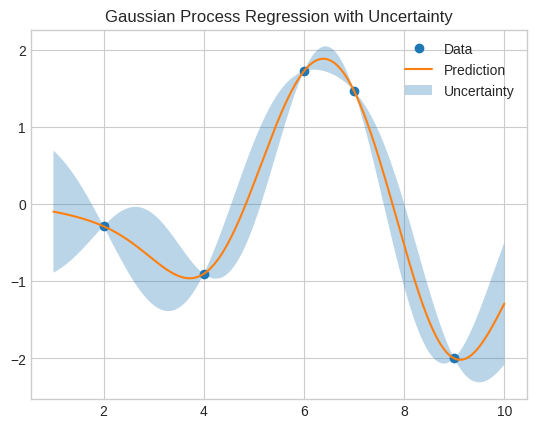

In [19]:
# Plot
plt.plot(x, y, 'o', label='Data')
plt.plot(x_fit, y_fit, '-', label='Prediction')
plt.fill_between(x_fit, y_fit - y_err, y_fit + y_err, alpha=0.3, label='Uncertainty')
plt.legend()
plt.title("Gaussian Process Regression with Uncertainty")
plt.show()
